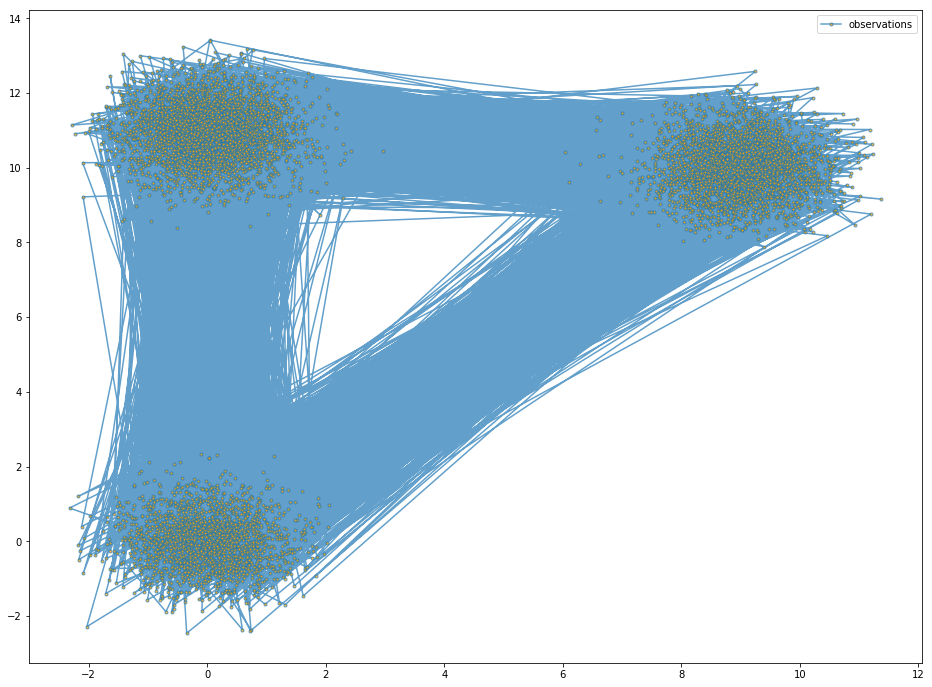

In [73]:
import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

##############################################################
# Prepare parameters for a 4-components HMM
# Initial population probability
startprob = np.array([0.6, 0.3, 0.1])
# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.2, 0.3, 0.5],
                     [0.4, 0.4, 0.2],
                     [0.1, 0.5, 0.4]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (3, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=3, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
###############################################################

# Generate samples
X, Z = model.sample(10000)

# Plot the sampled data
plt.figure(figsize=(16,12))
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
#for i, m in enumerate(means):
 #   plt.text(m[0], m[1], 'Component %i' % (i + 1),
  #           size=17, horizontalalignment='center',
   #          bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

In [74]:
test_model  = hmm.GaussianHMM(n_components=3, covariance_type="full", verbose = True)

In [75]:
test_model.fit(X)

         1      -57945.2958             +nan
         2      -45300.0633      +12645.2326
         3      -32072.2180      +13227.8453
         4      -31535.3405        +536.8775
         5      -31535.3405          +0.0000


GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=10, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=True)

In [76]:
test_model.transmat_

array([[0.39804147, 0.50662442, 0.0953341 ],
       [0.20331546, 0.39736714, 0.39931741],
       [0.51835052, 0.29360825, 0.18804124]])